# Tensorflow : Binary & Multiclass classification

In this notebook, I'm going to:

- Create a mood classifer using the TF Keras Sequential
- Build a ConvNet to identify sign language digits using the TF Keras Functional API

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

### 1. Is he smiling ?

The Happy House dataset contains images of peoples' faces. I'm going to build a ConvNet that determines whether the people in the images are smiling or not -- because they only get to enter the house if they're smiling!

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


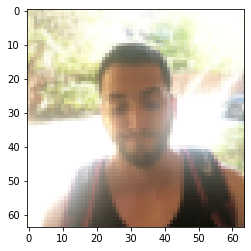

In [3]:
index = 124
plt.imshow(X_train_orig[index])
plt.show()

In [36]:
def happyModel():
    model = tf.keras.Sequential([
            tfl.ZeroPadding2D(padding=3,input_shape=(64,64,3)),
            tfl.Conv2D(filters=32,kernel_size=7,strides=1),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPooling2D(),
            tfl.Flatten(),
            tfl.Dense(1,activation='sigmoid')
        ])
    
    return model

In [38]:
happy_model = happyModel()
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [39]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [40]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 100ms/step - loss: 1.2903 - accuracy: 0.7050
Epoch 2/10
38/38 [==============================] - 4s 97ms/step - loss: 0.2260 - accuracy: 0.9183
Epoch 3/10
38/38 [==============================] - 4s 95ms/step - loss: 0.3233 - accuracy: 0.8817
Epoch 4/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1680 - accuracy: 0.9383
Epoch 5/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1239 - accuracy: 0.9550
Epoch 6/10
38/38 [==============================] - 4s 92ms/step - loss: 0.1066 - accuracy: 0.9650
Epoch 7/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1253 - accuracy: 0.9550
Epoch 8/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0740 - accuracy: 0.9750
Epoch 9/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0691 - accuracy: 0.9767
Epoch 10/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0714 - accuracy: 0.9733


In [41]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 36ms/step - loss: 0.1855 - accuracy: 0.9133


[0.18549737334251404, 0.9133333563804626]

### 2. What is the number ?

The SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

In [45]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


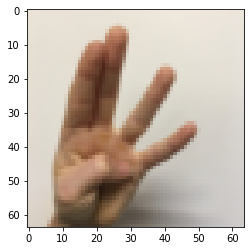

In [46]:
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [44]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [62]:
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(8,4,1,padding='SAME')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(8,8,padding='SAME')(A1)
    Z2 = tfl.Conv2D(16,2,1,padding='SAME')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(4,4,padding='SAME')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6,activation='softmax')(F)    
    

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [64]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 107ms/step - loss: 1.8614 - accuracy: 0.1759 - val_loss: 1.7975 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7888 - accuracy: 0.1500 - val_loss: 1.7842 - val_accuracy: 0.1583
Epoch 3/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7811 - accuracy: 0.2426 - val_loss: 1.7790 - val_accuracy: 0.2917
Epoch 4/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7747 - accuracy: 0.2926 - val_loss: 1.7737 - val_accuracy: 0.3000
Epoch 5/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7677 - accuracy: 0.2935 - val_loss: 1.7679 - val_accuracy: 0.2833
Epoch 6/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7574 - accuracy: 0.3130 - val_loss: 1.7584 - val_accuracy: 0.2500
Epoch 7/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7440 - accuracy: 0.3574 - val_loss: 1.7480 - val_accuracy: 0.3250

Epoch 58/100
17/17 [==============================] - 2s 111ms/step - loss: 0.6461 - accuracy: 0.7954 - val_loss: 0.7208 - val_accuracy: 0.7500
Epoch 59/100
17/17 [==============================] - 2s 111ms/step - loss: 0.6376 - accuracy: 0.7972 - val_loss: 0.7142 - val_accuracy: 0.7500
Epoch 60/100
17/17 [==============================] - 2s 111ms/step - loss: 0.6294 - accuracy: 0.7981 - val_loss: 0.7071 - val_accuracy: 0.7500
Epoch 61/100
17/17 [==============================] - 2s 111ms/step - loss: 0.6214 - accuracy: 0.8019 - val_loss: 0.7009 - val_accuracy: 0.7417
Epoch 62/100
17/17 [==============================] - 2s 106ms/step - loss: 0.6141 - accuracy: 0.8037 - val_loss: 0.6934 - val_accuracy: 0.7417
Epoch 63/100
17/17 [==============================] - 2s 106ms/step - loss: 0.6065 - accuracy: 0.8028 - val_loss: 0.6882 - val_accuracy: 0.7417
Epoch 64/100
17/17 [==============================] - 2s 106ms/step - loss: 0.5994 - accuracy: 0.8046 - val_loss: 0.6811 - val_accuracy:

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

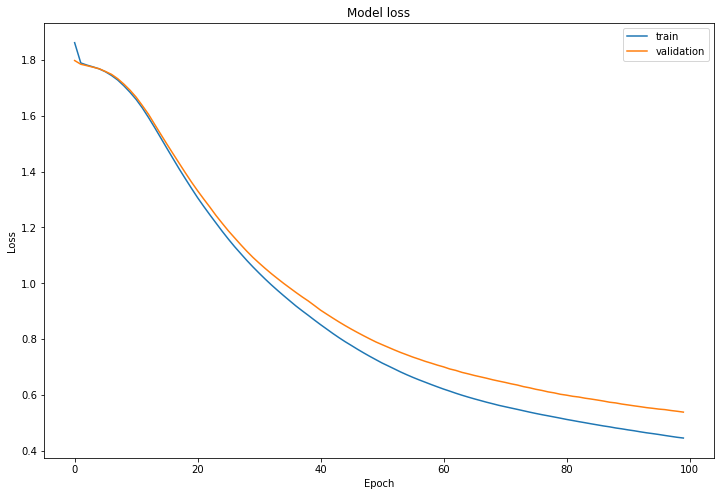

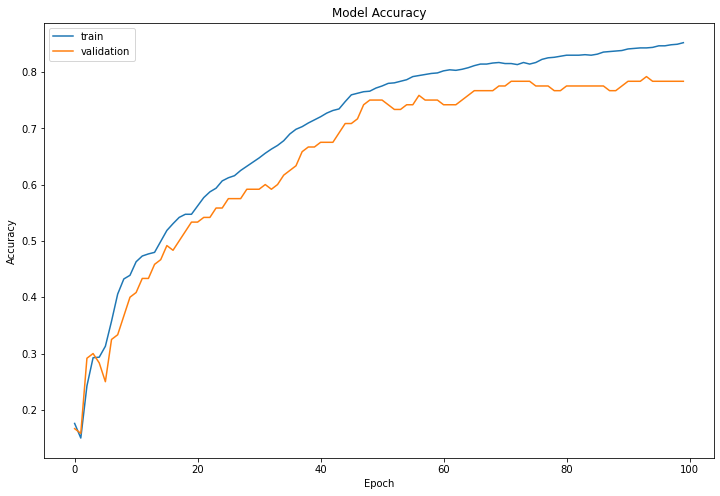

In [67]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')